In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time as t
import sklearn.utils as u
import sklearn.preprocessing as pp
import sklearn.tree as tr
import sklearn.ensemble as es
import sklearn.metrics as m
import sklearn.linear_model as lm
import sklearn.neural_network as nn
df=pd.read_csv('AI-Data.csv')
df.shape

(480, 17)

In [57]:
df.isna().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [58]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


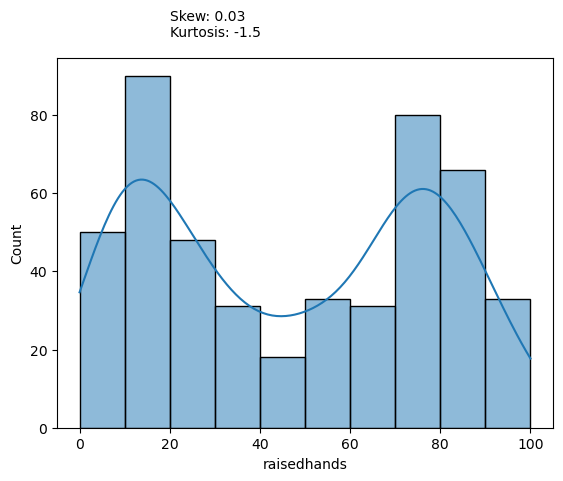

In [59]:
scores = df.columns[df.columns.str.contains('raisedhands')].tolist()
for score in scores:
    sns.histplot(df[score], element='bars', kde=True)
    plt.text(x=20, y=100, s=f"Skew: {round(df[score].skew(),2)}\nKurtosis: {round(df[score].kurt(),2)}")
    plt.show()
    


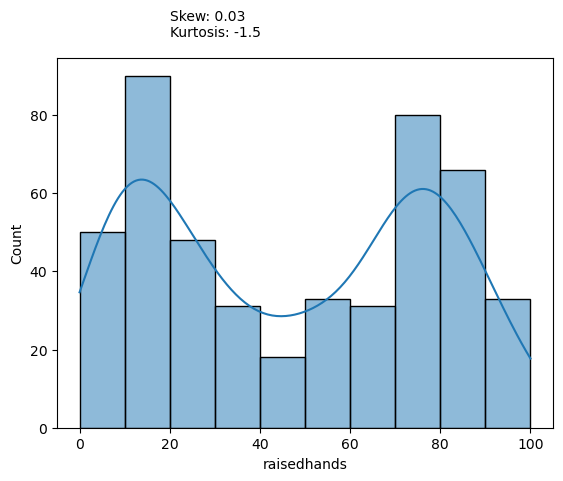

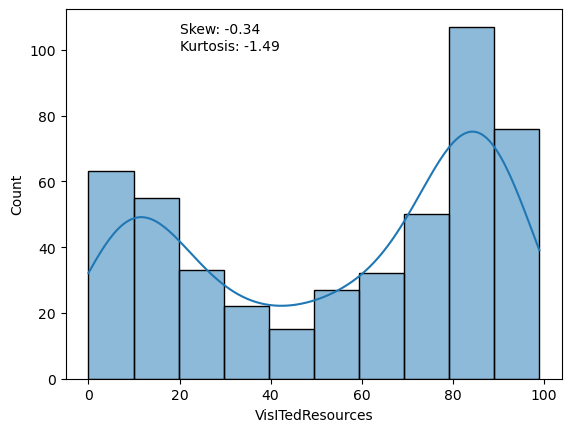

In [60]:
scores = df.columns[df.columns.str.contains('raisedhands')].tolist()
for score in scores:
    sns.histplot(df[score], element='bars', kde=True)
    plt.text(x=20, y=100, s=f"Skew: {round(df[score].skew(),2)}\nKurtosis: {round(df[score].kurt(),2)}")
    plt.show()
scores = df.columns[df.columns.str.contains('VisITedResources')].tolist()
for score in scores:
    sns.histplot(df[score], element='bars', kde=True)
    plt.text(x=20, y=100, s=f"Skew: {round(df[score].skew(),2)}\nKurtosis: {round(df[score].kurt(),2)}")
    plt.show()


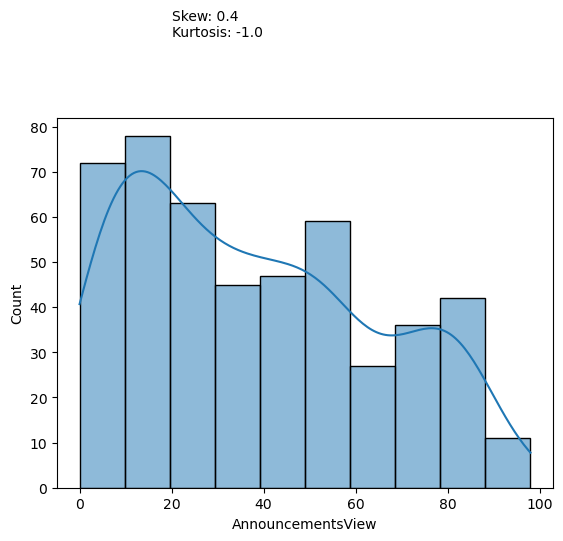

In [61]:
scores = df.columns[df.columns.str.contains('AnnouncementsView')].tolist()
for score in scores:
    sns.histplot(df[score], element='bars', kde=True)
    plt.text(x=20, y=100, s=f"Skew: {round(df[score].skew(),1)}\nKurtosis: {round(df[score].kurt(),2)}")
    plt.show()


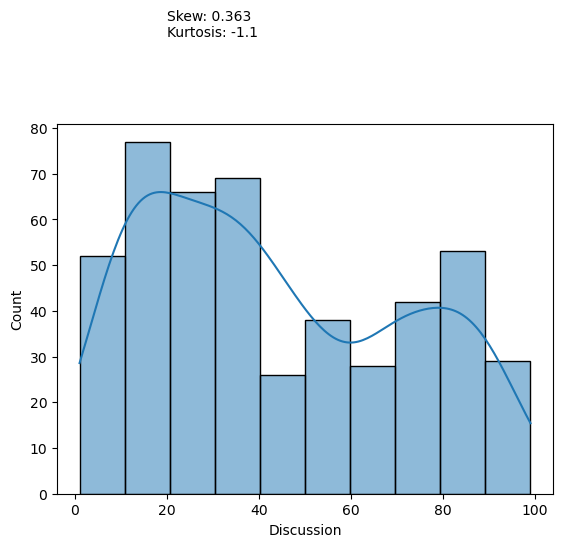

In [62]:
scores = df.columns[df.columns.str.contains('Discussion')].tolist()
for score in scores:
    sns.histplot(df[score], element='bars', kde=True)
    plt.text(x=20, y=100, s=f"Skew: {round(df[score].skew(),3)}\nKurtosis: {round(df[score].kurt(),1)}")
    plt.show()

M    305
F    175
Name: gender, dtype: int64


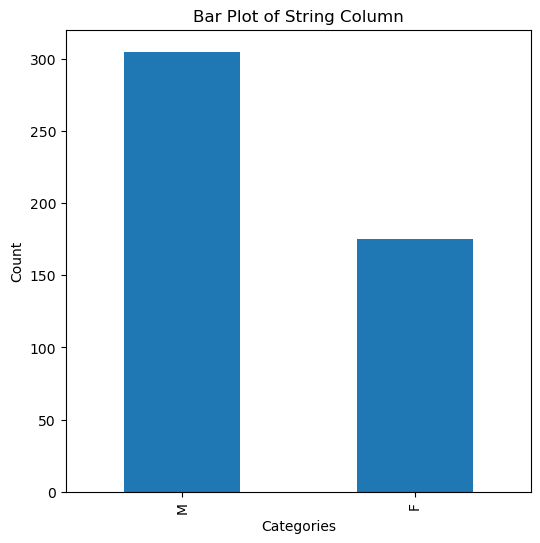

In [63]:
column_counts = df['gender'].value_counts()
print(column_counts)
plt.figure(figsize=(6, 6))
column_counts.plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Plot of String Column')
plt.show()

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64


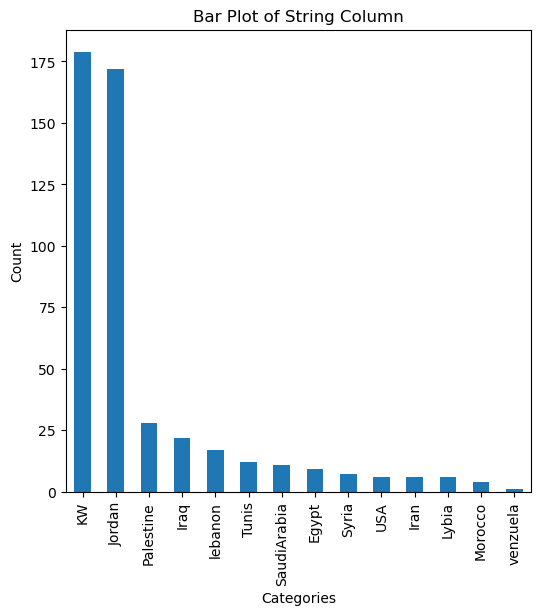

In [64]:
column_counts = df['NationalITy'].value_counts()
print(column_counts)
plt.figure(figsize=(6, 6))
column_counts.plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Plot of String Column')
plt.show()

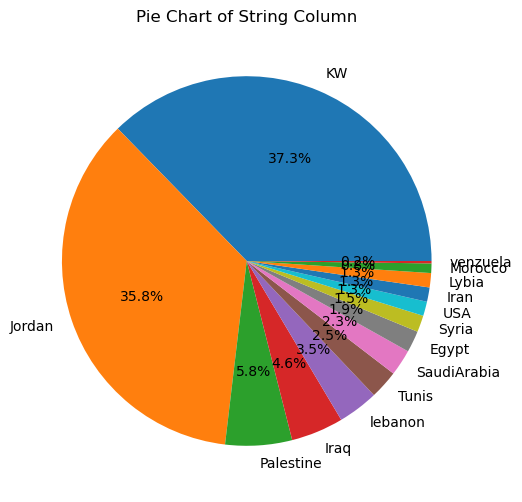

In [65]:
column_counts = df['NationalITy'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(column_counts, labels=column_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of String Column')
plt.show()


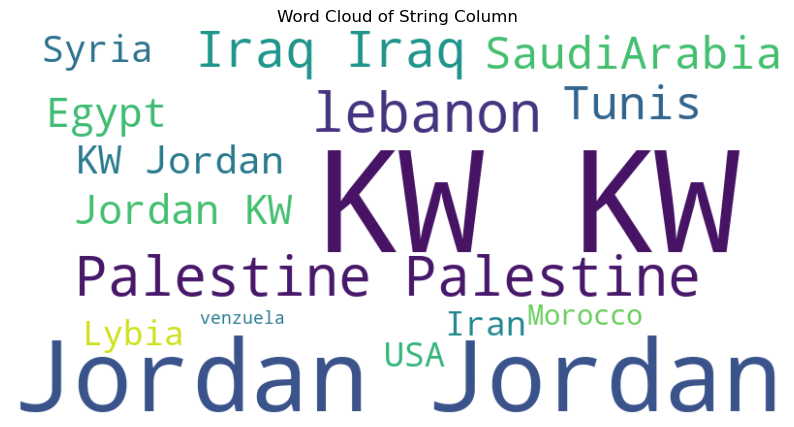

In [66]:
from wordcloud import WordCloud
text = ' '.join(df['NationalITy'])
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of String Column')
plt.show()


IT           95
French       65
Arabic       59
Science      51
English      45
Biology      30
Spanish      25
Chemistry    24
Geology      24
Quran        22
Math         21
History      19
Name: Topic, dtype: int64


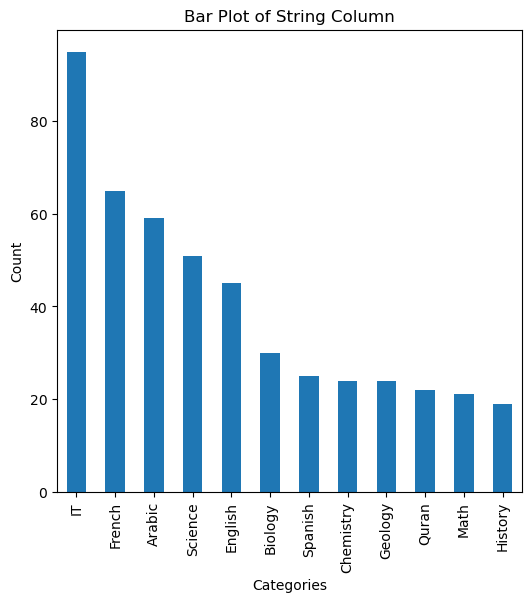

In [67]:
column_counts = df['Topic'].value_counts()
print(column_counts)
plt.figure(figsize=(6, 6))
column_counts.plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Plot of String Column')
plt.show()


M    211
H    142
L    127
Name: Class, dtype: int64


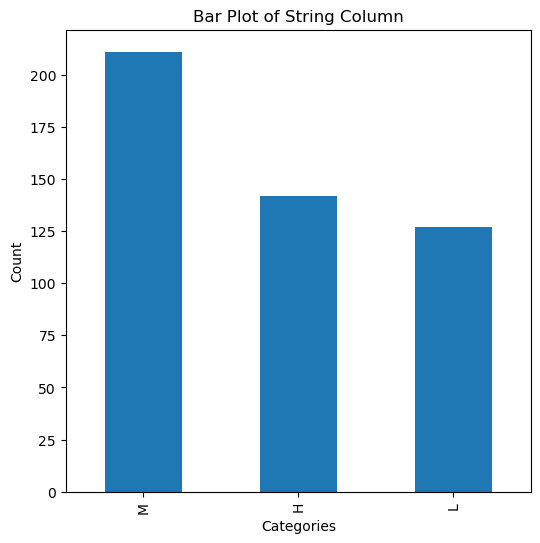

In [68]:
column_counts = df['Class'].value_counts()
print(column_counts)
plt.figure(figsize=(6, 6))
column_counts.plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Plot of String Column')
plt.show()

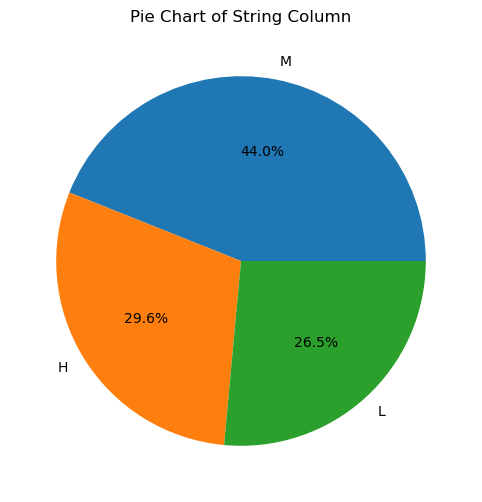

In [69]:
column_counts = df['Class'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(column_counts, labels=column_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of String Column')
plt.show()

<Figure size 1000x600 with 0 Axes>

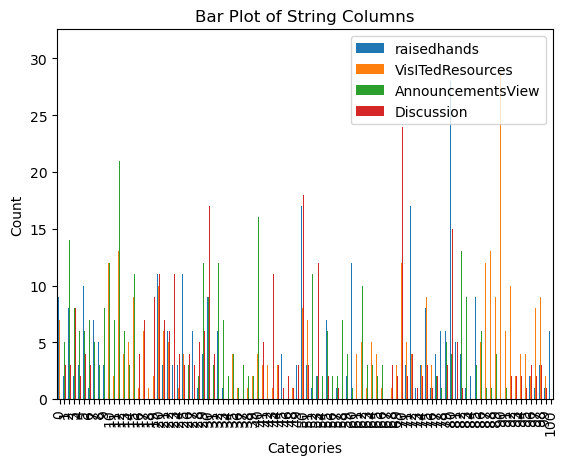

In [70]:
string_columns = df.select_dtypes(include=['int'])
column_counts = string_columns.apply(pd.Series.value_counts)
plt.figure(figsize=(10, 6))
column_counts.plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Plot of String Columns')
plt.legend(loc='upper right')
plt.show()

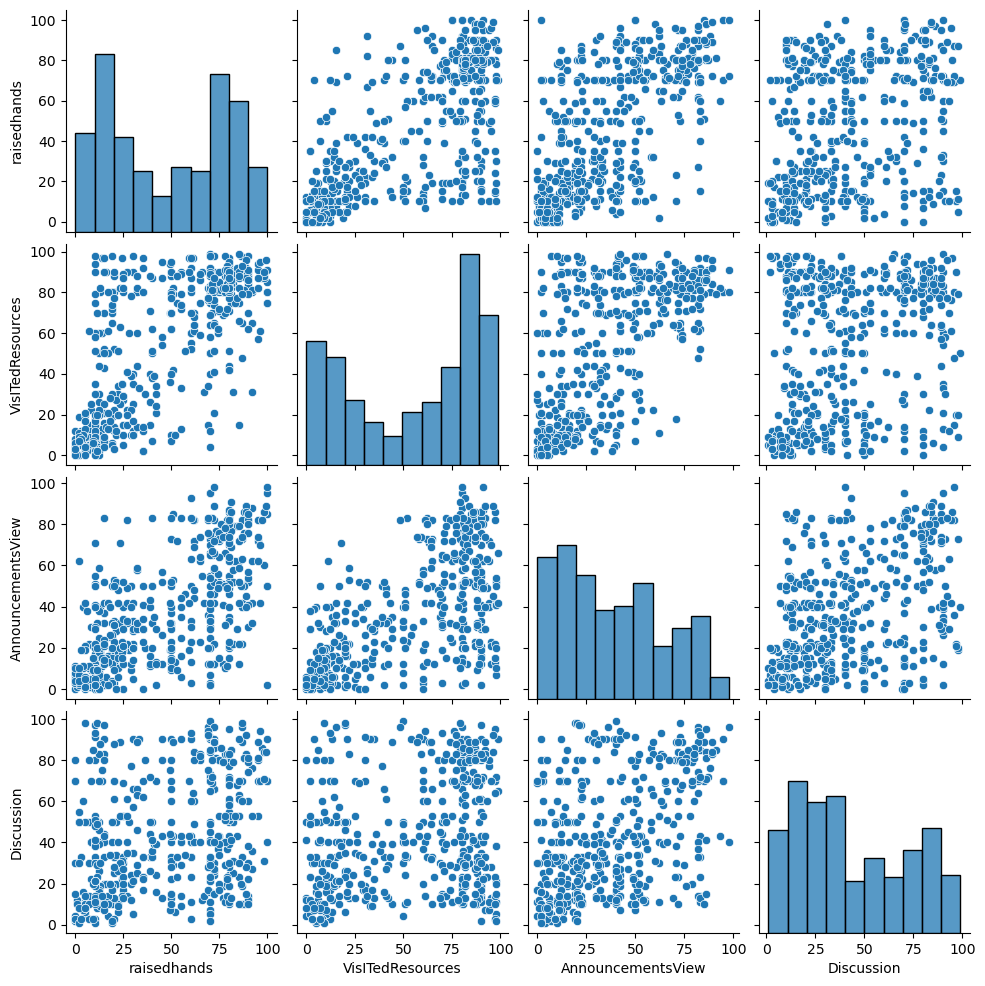

In [71]:
sns.pairplot(data = df)

label Encoder

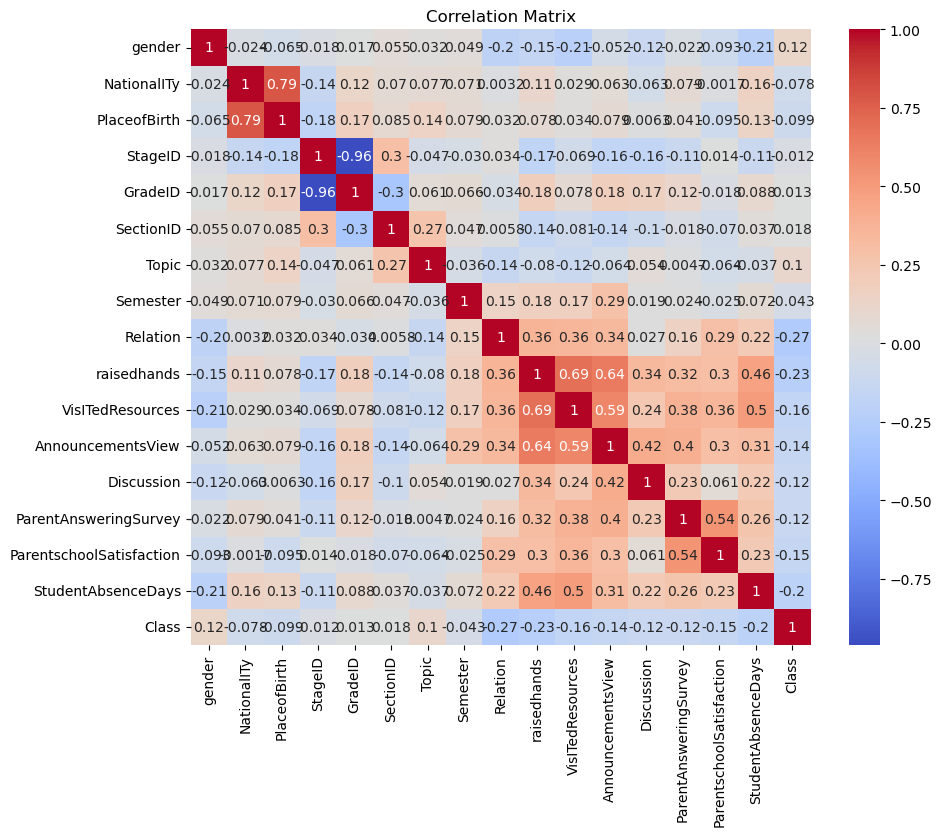

In [72]:
for column in df.columns:
    if df[column].dtype == type(object):
        le = pp.LabelEncoder()
        df[column] = le.fit_transform(df[column])
X=df.drop('Class', axis=1)
y=df['Class']
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


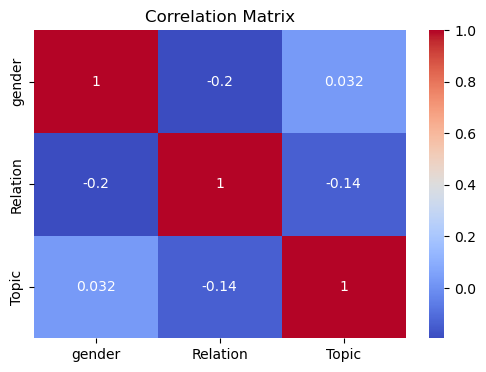

In [73]:

x=X[['gender','Relation','Topic']]
correlation_matrix = x.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


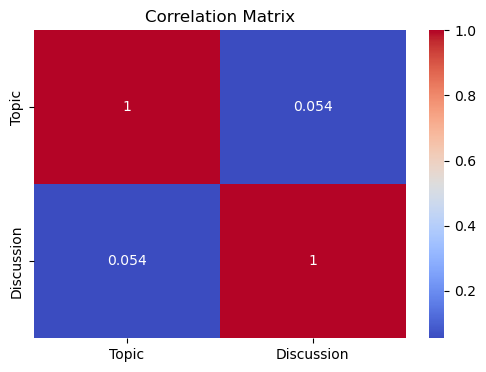

In [74]:
x=X[['Topic','Discussion']]
correlation_matrix = x.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(384, 16)
(96, 16)
(384,)
(96,)


logistic Regression

In [76]:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


D:\anacondaInstalled\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [77]:
print(model.intercept_) #b0
print(model.coef_) #b1


[-0.7664467   0.59892731  0.16751939]
[[-1.06260634e+00 -2.40871720e-01  2.96094281e-01 -1.45942813e+00
  -4.78111535e-01 -7.99033728e-02 -7.21557133e-02 -2.15233865e-01
   6.28528762e-01  2.83154172e-02  1.87706718e-02  1.75986081e-02
   1.33763453e-02  4.35854941e-01  2.81355616e-01  8.12482475e-01]
 [ 8.64089502e-01  1.41356620e-01 -1.44521288e-01  1.27885527e+00
   3.79625531e-01 -1.02354394e-01  1.81234579e-02  5.79420104e-01
   8.15566872e-02 -2.79240256e-02 -2.42359532e-02 -3.29192690e-02
  -8.08312552e-03 -5.78513580e-01 -2.50583814e-01 -1.21946073e+00]
 [ 1.98516839e-01  9.95150999e-02 -1.51572993e-01  1.80572866e-01
   9.84860033e-02  1.82257767e-01  5.40322555e-02 -3.64186239e-01
  -7.10085450e-01 -3.91391570e-04  5.46528142e-03  1.53206609e-02
  -5.29321975e-03  1.42658639e-01 -3.07718026e-02  4.06978251e-01]]


In [78]:
y_pred = model.predict(X_test)
print(X_test[:5])
print(y_pred[:5])


     gender  NationalITy  PlaceofBirth  StageID  GradeID  SectionID  Topic  \
293       0            7             7        2        1          0     10   
283       0            3             3        1        3          0      3   
34        1            4             4        1        4          1     10   
380       0            3             3        2        0          1      0   
430       1            3             8        1        5          0      5   

     Semester  Relation  raisedhands  VisITedResources  AnnouncementsView  \
293         1         1           62                64                 72   
283         1         1           97                87                 82   
34          0         0           12                11                  8   
380         0         0           11                20                 20   
430         0         0           85                89                 22   

     Discussion  ParentAnsweringSurvey  ParentschoolSatisfaction  \


In [79]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
a=accuracy_score(y_test, y_pred)
print(a*100)


67.70833333333334


In [80]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_train)
a=accuracy_score(y_train, y_pred)
print(a*100)

75.26041666666666


DecisionTreeClassifier and its accuracy

In [81]:
from sklearn.tree import DecisionTreeClassifier
gnb = DecisionTreeClassifier()
gnb=gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred, normalize=False))


0.6979166666666666
67


Confusion_matrix


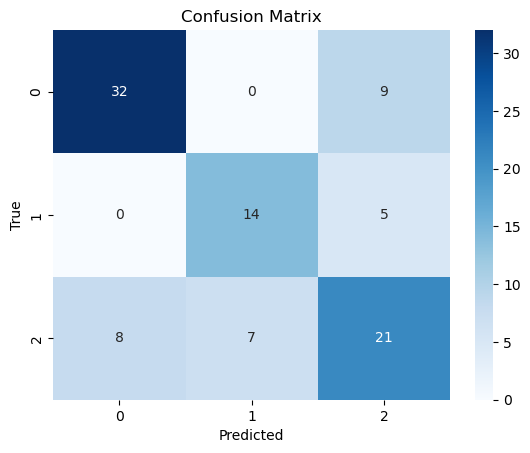

In [82]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
labels = np.unique(y) # Get unique labels from your target variable
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

F1-Score

In [83]:

from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='micro')
f1


0.6979166666666666

In [84]:
f1 = f1_score(y_test, y_pred, average='weighted')
f1


0.6978212122529416

In [85]:
f1 = f1_score(y_test, y_pred, average='macro')
f1

0.6938909175215905

SVM

In [86]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)


SVC()

In [87]:
y_pred = clf.predict(X_test)

SVM Accuracy

In [88]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)


Accuracy: 60.416666666666664


Xgboots


In [89]:

import xgboost as xgb
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

Xgboots accuracy

In [90]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)


Accuracy: 80.20833333333334
